In [1]:
library(rstan)
library(brms)
library(here)
library(ggplot2)


# 計算の高速化
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


要求されたパッケージ StanHeaders をロード中です


rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


要求されたパッケージ Rcpp をロード中です

Loading 'brms' package (version 2.21.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


次のパッケージを付け加えます: ‘brms’


以下のオブジェクトは ‘package:rstan’ からマスクされています:

    loo


以下のオブジェクトは ‘package:stats’ からマスクされています:

    ar


here() starts at /media/e595/Game/プロジェクト置き場/RとStanで始めるベイズ統計モデリング



In [2]:
fish_num_climate_4 <- read.csv(here("data", "4-3-1-fish-num-4.csv"))
head(fish_num_climate_4, n = 3)


,fish_num,temperature,human
,<int>,<dbl>,<chr>
1,2,12.7,A
2,6,13.7,B
3,9,15.7,C


In [3]:
summary(fish_num_climate_4)


    fish_num       temperature       human          
 Min.   : 0.000   Min.   :10.10   Length:94         
 1st Qu.: 4.000   1st Qu.:13.22   Class :character  
 Median : 7.000   Median :14.85   Mode  :character  
 Mean   : 8.787   Mean   :15.13                     
 3rd Qu.:11.000   3rd Qu.:17.52                     
 Max.   :29.000   Max.   :19.90                     

In [4]:
glmm_pois_brms_interaction <- brm(
  formula = fish_num ~ temperature * human,
  family = poisson(),
  data = fish_num_climate_4,
  seed = 1,
  prior = c(set_prior("", class = "Intercept"))
)


Compiling Stan program...

Start sampling



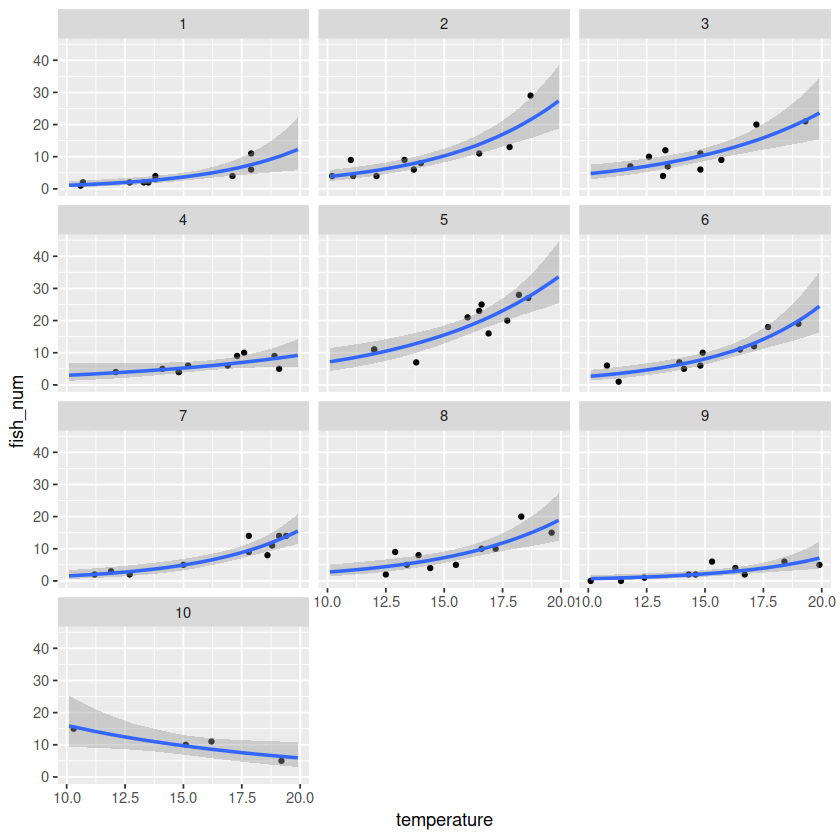

In [5]:
conditions <- data.frame(
  human = c("A", "B", "C", "D", "E", "F", "G", "H", "I", "J")
)
eff_1 <- conditional_effects(
  glmm_pois_brms_interaction,
  effects = "temperature",
  conditions = conditions
)
plot(eff_1, points = TRUE)


In [6]:
glmm_pois_brms_keisu <- brm(
  formula = fish_num ~ temperature + (temperature || human),
  family = poisson(),
  data = fish_num_climate_4,
  seed = 1,
  iter = 6000,
  warmup = 5000,
  control = list(adapt_delta = 0.97, max_treedepth = 15)
)


Compiling Stan program...

Start sampling

Warning message:
“There were 3 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”


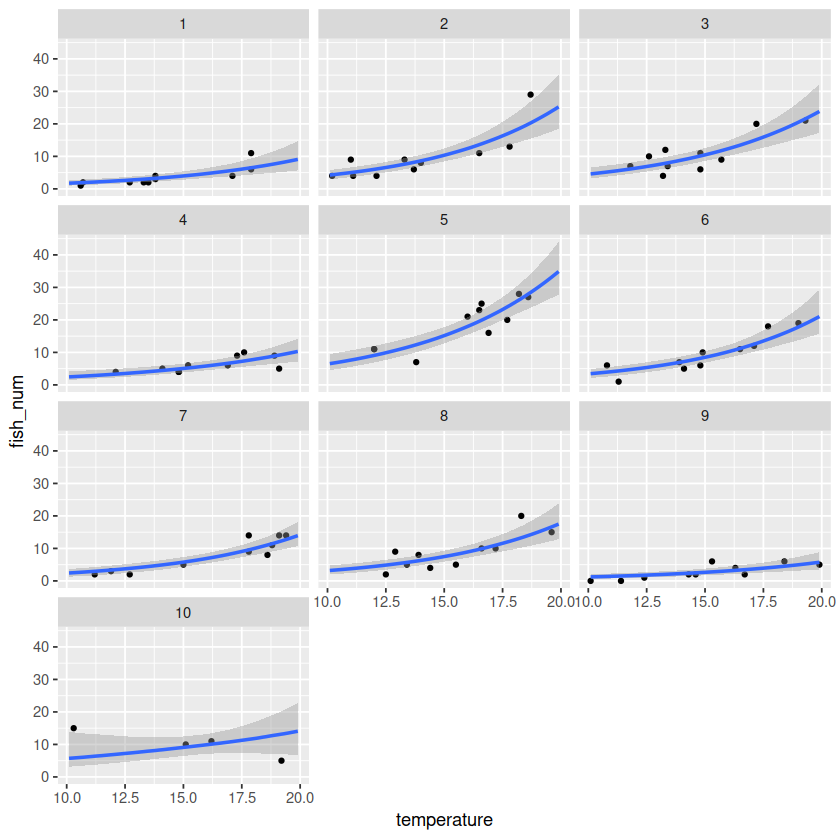

In [7]:
conditions <- data.frame(
  human = c("A", "B", "C", "D", "E", "F", "G", "H", "I", "J")
)

eff_2 <- conditional_effects(
  glmm_pois_brms_keisu,
  re_formula = NULL,
  effects = "temperature",
  conditions = conditions
)
plot(eff_2, points = TRUE)
